## Scikit-learn

In [13]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import plotDecisionRegions
%reload_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

`from sklearn.cross_validation import train_test_split`

已经被替代为

`from sklearn.model_selection import train_test_split`

### 初步使用
读取数据

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

划分数据集

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

数据预处理

In [4]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

训练感知器

In [5]:
ppn = Perceptron(max_iter=40,tol=1e-3,eta0=0.1,random_state=0)
ppn.fit(X_train_std,y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=40, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=0.001,
      validation_fraction=0.1, verbose=0, warm_start=False)

预测数据

In [7]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: {}'.format(np.sum(y_test!=y_pred)))

Misclassified samples: 4


使用准确率来评判模型

In [11]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,y_pred)))

Accuracy: 0.91


绘制决策区域

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


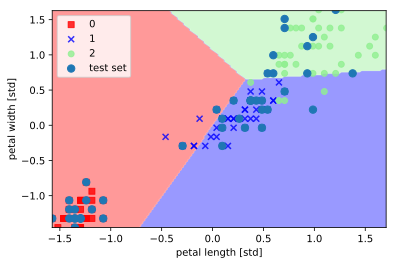

In [17]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
plotDecisionRegions.plot_decision_regions(X=X_combined_std,y=y_combined,
                                         classifier=ppn,test_idx=range(105,150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')